# Regression and Other Stories: Chapter 6

In [10]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from bambi import Model
import arviz as az
import numpy as np

In [11]:
# R is one indexed
x = np.arange(1, 21)
n = x.shape
a = .2
b = .3
sigma = .5
y = a + b*x + sigma*stats.norm().rvs(n)

In [13]:
fake = pd.DataFrame({"x":x, "y":y})

In [15]:
model = Model(fake)
results = model.fit('y ~ x', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
INFO:pymc3:Sequential sampling (4 chains in 1 job)
NUTS: [y_sd, x, Intercept]
INFO:pymc3:NUTS: [y_sd, x, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


In [32]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=False)
coefs

,Median,MAD_SD
Intercept[0],0.521,0.160
x[0],0.276,0.014
y_sd,0.496,0.061


Text(10.5, 3.419, 'y = 0.52 + 0.28 * x')

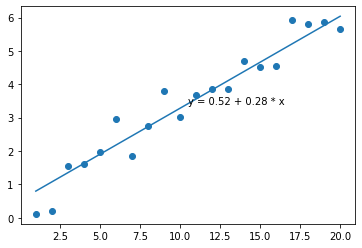

In [29]:
a_hat = coefs.loc["Intercept[0]", "median"]
b_hat = coefs.loc["x[0]", "median"]

fig, ax = plt.subplots()
ax.plot(x, a_hat+b_hat*x)
ax.scatter(x, y)

x_bar = x.mean()
ax.text(x_bar, a_hat+b_hat*x_bar,
       f"y = {np.round(a_hat, 2)} + {np.round(b_hat, 2)} * x")